In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
pd.options.display.max_columns = None
df.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,4.0,2.0,5.0,5.0,6.0,7.0,2.0,1.0,4.0,3.0,My job status or other personal status changed,NaN,NaN,Monthly,NaN,KES,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,1,Agile;Scrum,Git,Multiple times per day,Yes,No,NaN,Strongly agree,Strongly agree,Strongly agree,Saw an online advertisement and then researche...,1.0,5.0,4.0,7.0,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,Unite

In [65]:
from IPython.display import Image
Image("..C:\Users\ASUS\Desktop\kaggle_work\stackoverflow2018\stackoverflow.png")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 4-5: truncated \UXXXXXXXX escape (<ipython-input-65-f4274d4cf0f2>, line 2)

In [3]:
print ("Number of rows    :",df.shape[0])
print ("Number of columns :",df.shape[1])

Number of rows    : 98855
Number of columns : 129


In [52]:
df.describe()

,Respondent,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,ConvertedSalary,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7
count,98855.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,64918.000000,64918.000000,64918.000000,64918.000000,64918.000000,64918.000000,64918.000000,64918.000000,64918.000000,64918.000000,64917.000000,48706.000000,48706.000000,48706.000000,48706.000000,48706.000000,46213.000000,46213.000000,46213.000000,46213.000000,46213.000000,46213.00000,46213.000000,4.770200e+04,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000
mean,50822.971635,6.397089,6.673524,5.906875,4.065791,3.953243,4.407196,5.673181,4.225200,7.640009,6.057804,1.884177,6.080609,4.450553,7.563218,7.068101,5.765581,6.948196,5.615053,7.920746,6.865061,5.838625,3.035396,1.560588,3.849998,3.005112,3.548906,3.709541,4.224309,3.796572,3.015602,3.443338,4.97425,4.836388,9.578086e+04,2.726880,3.805784,3.340945,3.782470,4.383604,5.138809,4.821459
std,29321.650410,2.788428,2.531202,2.642734,2.541196,2.520499,2.502069,2.923998,2.507411,2.407457,2.663405,1.880973,3.080841,2.808365,2.830099,2.638513,2.851319,2.746491,2.782918,2.765758,2.687617,2.706479,1.326079,0.906463,1.315095,1.160622,1.116461,2.071172,1.842500,2.082178,1.651321,1.983163,1.86063,1.659844,2.023482e+05,1.881078,1.821323,1.673485,1.844864,1.931746,1.853249,1.874895
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25443.500000,4.000000,5.000000,4.000000,2.000000,2.000000,2.000000,3.000000,2.000000,6.000000,4.000000,1.000000,3.000000,2.000000,5.000000,5.000000,3.000000,5.000000,3.000000,6.000000,5.000000,4.000000,2.000000,1.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,4.00000,4.000000,2.384400e+04,1.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000
50%,50823.000000,7.000000,7.000000,6.000000,4.000000,3.000000,4.000000,6.000000,4.000000,8.000000,6.000000,1.000000,6.000000,4.000000,8.000000,7.000000,5.000000,7.000000,5.000000,9.000000,7.000000,6.000000,3.000000,1.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,5.00000,5.000000,5.507500e+04,2.000000,4.000000,3.000000,4.000000,5.000000,6.000000,5.000000
75%,76219.500000,9.000000,9.000000,8.000000,6.000000,6.000000,6.000000,8.000000,6.000000,10.000000,8.000000,2.000000,9.000000,6.000000,10.000000,9.000000,8.000000,9.000000,8.000000,10.000000,9.000000,8.000000,4.000000,2.000000,5.000000,4.000000,4.000000,6.000000,6.000000,6.000000,4.000000,5.000000,7.00000,6.000000,9.300000e+04,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000
max,101592.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,5.000000,5.000000,5.000000,5.000000,5.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,2.000000e+06,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


# Introduction
* More than 80% of the respondents consider Coding as a Hobby.
1. The total analysis is divided into a couple of subject areas such as

* Desire to Learn in Next Year

* Lifestyle Analysis

* Salary Analysis

* AI Viewpoint Analysis

* Job Assessment Analysis

* Job Benefits Analysis

* Developer mentalities

* Ethics analysis

* StackOverflow Inclusivity analysis

* Hypothetical Tools Interest

* Persona analysis of Engineering Managers, C- Suite Execs, Devops Specialists, Front End Developers, Back End Developers , Data Scientists and Business Analysts



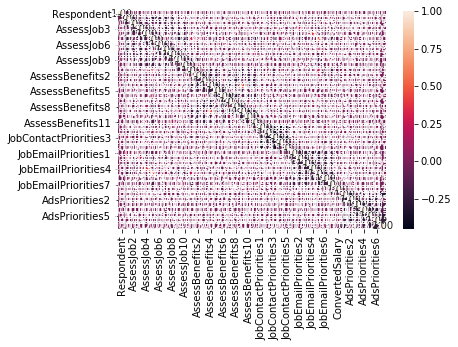

In [57]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");

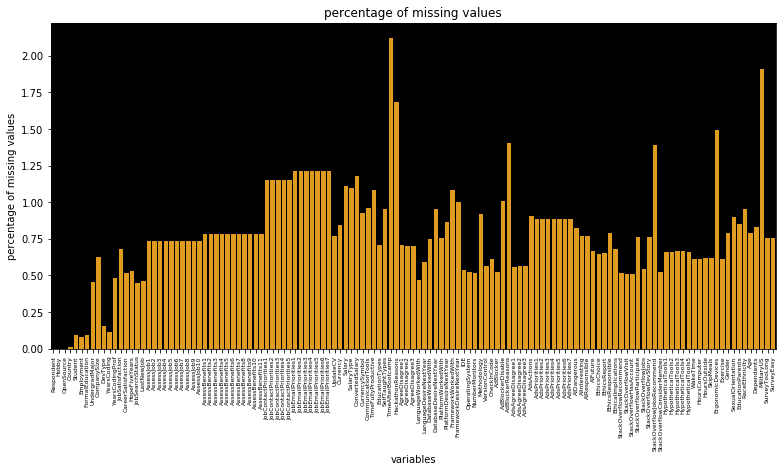

In [4]:
miss = df.isnull().sum().reset_index()
miss[0] = miss[0]*100/miss[0].sum()

plt.figure(figsize=(13,6))
ax = sns.barplot("index",0,data=miss,color="orange")
plt.xticks(rotation = 90,fontsize=6)
plt.title("percentage of missing values")
ax.set_facecolor("k")
ax.set_ylabel("percentage of missing values")
ax.set_xlabel("variables")
plt.show()

In [46]:
print(df.isnull().sum())

Respondent           0
Hobby                0
OpenSource           0
Country            412
Student           3954
                 ...  
Age              34281
Dependents       36259
MilitaryUS       83074
SurveyTooLong    32914
SurveyEasy       32976
Length: 129, dtype: int64


In [48]:
 #how many total missing values do we have?
missing_values_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()
print(total_missing, 'have missing values')

# percent of data that is missing
print((total_missing/total_cells) * 100, '% of Missing Values in Survey Results Public')

4349316 have missing values
34.10614324715669 % of Missing Values in Survey Results Public


In [49]:
# checking missing data in each survey results public column
total_missing = df.isnull().sum().sort_values(ascending = False)
percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_survey_results_public = pd.concat([total_missing, percentage], axis=1,
                                          keys=['Total Missing (Column-wise)', 'Percentage (%)'])
missing_survey_results_public.head()

,Total Missing (Column-wise),Percentage (%)
TimeAfterBootcamp,92203,93.270952
MilitaryUS,83074,84.036215
HackathonReasons,73164,74.011431
ErgonomicDevices,64797,65.547519
AdBlockerReasons,61110,61.817814


In [5]:
print ("Number of respondents :",df["Respondent"].nunique())

Number of respondents : 98855


# Survey question : Hobby- Do you code as a hobby? 

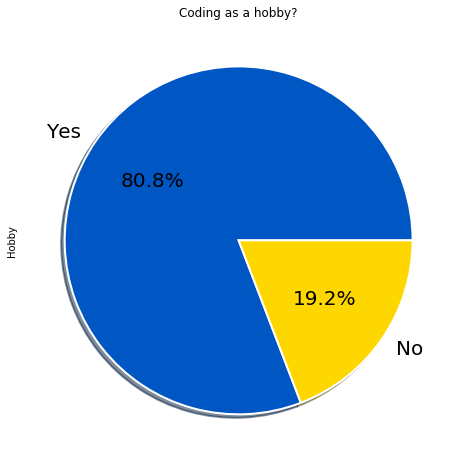

In [6]:
#Hobby Do you code as a hobby?
plt.figure(figsize=(8,8))
df["Hobby"].value_counts().plot.pie(autopct = "%1.1f%%",colors = sns.color_palette("prism",3),fontsize=20,
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
plt.title("Coding as a hobby?")
plt.show()

# Survey question : OpenSource - Do you contribute to open source projects?

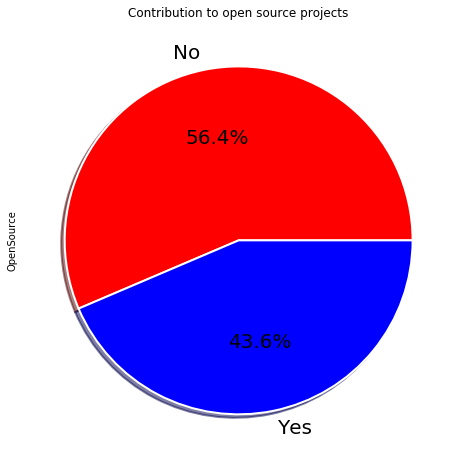

In [7]:
#OpenSource	Do you contribute to open source projects?
plt.figure(figsize=(8,8))
df["OpenSource"].value_counts().plot.pie(autopct = "%1.1f%%",colors = ["r","b"],fontsize=20,
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
plt.title("Contribution to open source projects")
plt.show()

# Respondents who code as hobby and contribute to open source projects

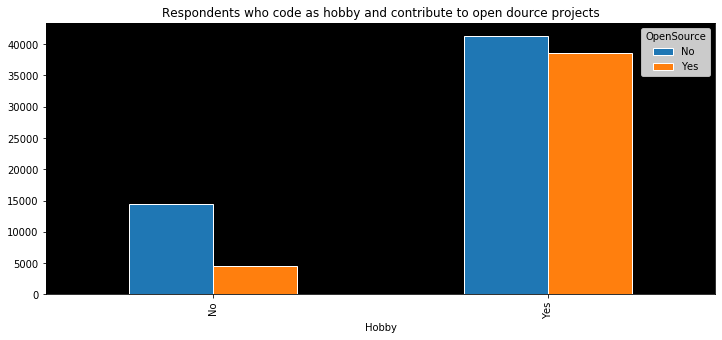

In [8]:
fig = pd.crosstab(df["Hobby"],df["OpenSource"]).plot(kind="bar",
                                                             figsize = (12,5),
                                                             linewidth = 1,
                                                             edgecolor = "w"*4)
fig.set_facecolor("k")
fig.set_title("Respondents who code as hobby and contribute to open dource projects")
plt.show()

# Survey question : Country - In which country do you currently reside?
United States , India , Germany , United Kingdom , Canada have highest number of responders.

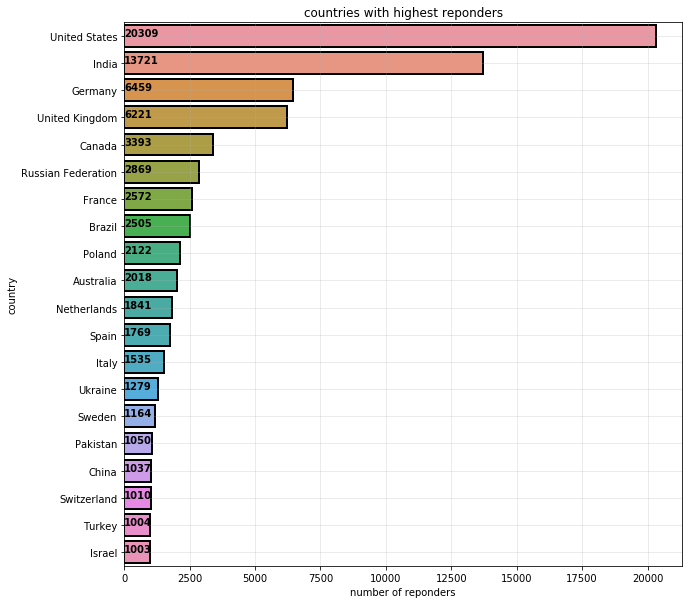

In [9]:
#Country - In which country do you currently reside?
plt.figure(figsize=(10,10))
country = df["Country"].value_counts().reset_index()
ax = sns.barplot("Country","index",data=country[:20],linewidth=2,edgecolor="k"*20)
plt.xlabel("number of reponders")
plt.ylabel("country")
plt.title("countries with highest reponders")
plt.grid(True,alpha=.3)

for i,j in enumerate(country["Country"][:20]):
    ax.text(.7,i,j,weight = "bold")

# word cloud for countries

In [10]:
from wordcloud import WordCloud,STOPWORDS

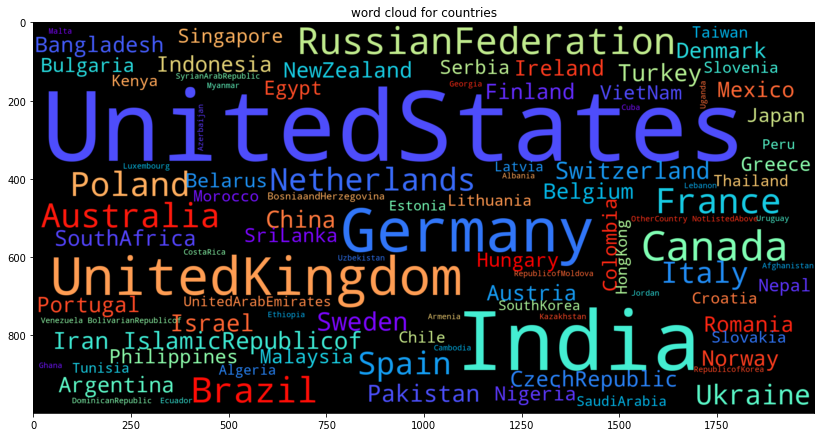

In [14]:
wrds = df[df["Country"].notnull()]["Country"].str.replace(" ","")
wc = WordCloud(background_color="black",colormap="rainbow",scale=5).generate(" ".join(wrds))
plt.figure(figsize=(14,10))
plt.imshow(wc,interpolation="bilinear")
plt.axis("on")
plt.title("word cloud for countries")
plt.show()

# Survey question : Student - Are you currently enrolled in a formal, degree-granting college or university program?¶

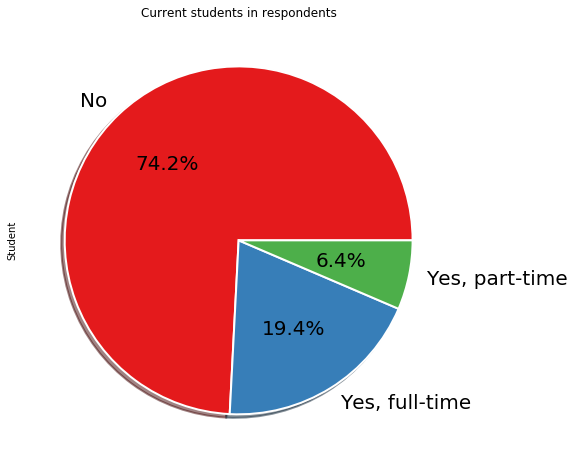

In [15]:
#Student - Are you currently enrolled in a formal, degree-granting college or university program?
plt.figure(figsize=(8,8))
df["Student"].value_counts().plot.pie(autopct = "%1.1f%%",colors = sns.color_palette("Set1"),fontsize=20,
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
plt.title("Current students in respondents")
plt.show()

In [19]:
import pycountry

from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [20]:
def plotlypie(labels, values, hole, pull, colors, title):
    data = [go.Pie(
        labels = labels,
        values = values,
        hole = hole,
        pull=pull,
        marker=dict(colors=colors)
    )]
    
    layout = go.Layout(title = title)
    fig = go.Figure(data = data, layout = layout)
    
    iplot(fig)
    
def plotlybar(labels1 = None, values1 = None, name1 = None,labels2 = None, values2 = None, 
              name2 =None, markercolor1 = '#9ECAE1', markercolor2 = '#ff99ff', title= None, 
              mode = 'group', orientation = 'v'):
    trace1 = go.Bar(
    x = labels1,
    y = values1,
    orientation = orientation, 
    text = values1,
    name = name1,
    textposition = 'auto',
    marker=dict(
        color=markercolor1#'rgb(58,200,225)',
        )
    )    
    
    if labels2 is not None:
        trace2 = go.Bar(
            x = labels2,
            y = values2,
            name = name2,
            text = values2,
            textposition = 'auto',
            marker=dict(
                color=markercolor2#'rgb(58,200,225)',
            )
        )
        data = [trace1, trace2]
    
    else:
        data = [trace1]
    layout = go.Layout(title = title,xaxis=dict(tickangle=-25),
    barmode=mode)
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)
    
def snslvplot(x,y,title):
    plt.figure(figsize = (16,8))
    sns.lvplot(x = x , y = y , palette = "cool" )
    plt.xticks(rotation = 75)
    plt.title(title)
    plt.show()
    
def snsstripplot(x,y,title):
    plt.figure(figsize = (16,8))
    sns.stripplot(x = x , y = y , palette = "cool" )
    plt.xticks(rotation = 75)
    plt.title(title)
    plt.show()
    
def snspointplot(x,y,data, hue, title):
    plt.figure(figsize=(16,8))
    ax = sns.pointplot(x = x, y = y ,data=data,hue=hue,palette="Set2")
    plt.xticks(rotation=90)
    plt.title(title)
    plt.show()
    
    

In [21]:
hobbies = df['Hobby'].value_counts()

colors = ['#FEBFB3', '#E1396C']
plotlypie(hobbies.index, hobbies.values, 0.6 ,0.05, colors, '% of developers having Coding as Hobby' )

In [22]:
opensource = df['OpenSource'].value_counts()
colors = ['#FEBFB3', '#E1396C']
plotlypie(opensource.index, opensource.values, 0.6 , 0.02,colors, '% of developers contribute to open source' )

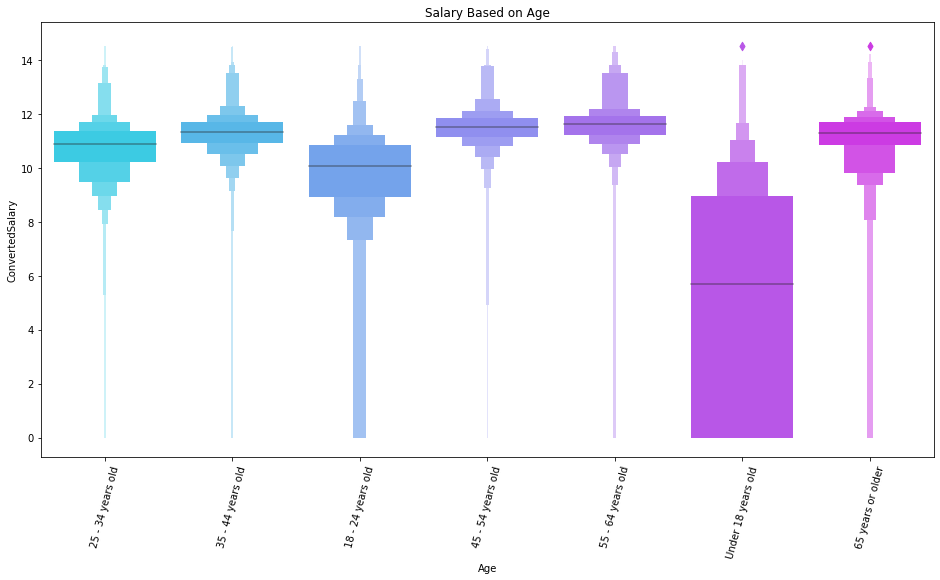

In [25]:
age = df['Age'].value_counts()
plotlybar(age.index, age.values, 'Age', title = 'Distribution of developers based on Age')
snslvplot( df["Age"] , np.log(df['ConvertedSalary'] + 1), "Salary Based on Age")

In [26]:
oscontribyes = df[df["OpenSource"] == "Yes"]
oscontribNo = df[df["OpenSource"] == "No"]
Agewisecontribyes = oscontribyes["Age"].value_counts()
Agewisecontribno = oscontribNo["Age"].value_counts()
plotlybar(Agewisecontribyes.index, Agewisecontribyes.values, 'Contribute to open Source',Agewisecontribno.index, Agewisecontribno.values,
          'Not Contribute to open Source','#9ECAE1','#ff99ff', title = 'Contribution to Open Source based on Developer`s age')

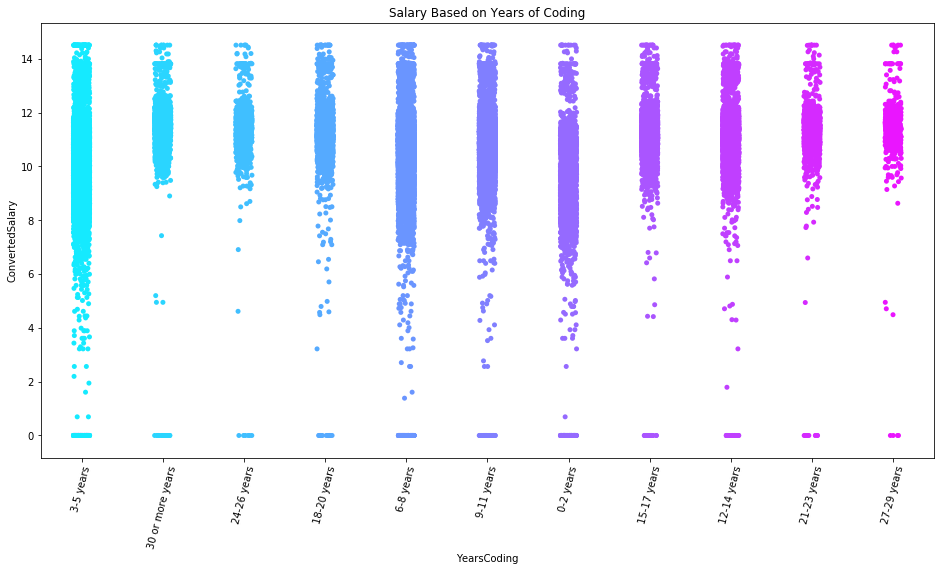

In [29]:
yearscodingyes = oscontribyes["YearsCoding"].value_counts()
yearscodingno = oscontribNo["YearsCoding"].value_counts()
plotlybar(yearscodingyes.index, yearscodingyes.values, 'Contribute to open Source',yearscodingno.index, yearscodingno.values,
          'Not Contribute to open Source','#9ECAF0','#ff99ff', title = 'Developers contribution to Open Source based on Years of Coding')
snsstripplot( df["YearsCoding"] , np.log(df['ConvertedSalary'] + 1), "Salary Based on Years of Coding")

In [30]:
Student = df['Student'].value_counts()
colors = ['#FEBFB3', '#E1396C','#ff9933']
plotlypie(Student.index, Student.values, 0.4 , 0.05,colors, 'is the respondent student ?' )

In [31]:
studentsyes = oscontribyes["Student"].value_counts()
studentsno = oscontribNo["Student"].value_counts()

plotlybar(studentsyes.index, studentsyes.values, 'Contribute to open Source',studentsno.index, studentsno.values,
          'Not Contribute to open Source','#9ECAE1','#ff99ff', title = 'How much students contribute to Open Source?')

In [32]:
oscontrib = oscontribyes["Country"].value_counts()[:20]
plotlybar(oscontrib.index[:20], oscontrib.values[:20], title =  'Top 20 countries which contribute more to open source')
plotlybar(oscontrib.index[-20:], oscontrib.values[-20:], markercolor1 = '#ff99ff',
          title = 'Least 20 countries which contribute less to open source')

In [33]:
temp1 = []
temp2 = []
for val in oscontrib.index:
    temp1.append(np.sum(df["Gender"][df['Country'] == val] == 'Male'))
    temp2.append(np.sum(df["Gender"][df['Country'] == val] == 'Female'))
    
plotlybar(oscontrib.index, temp1, 'Male',oscontrib.index, temp2,
          'female','#9ECAE1','#ff99ff', title = 'Gender based Open source contribution among top countries ')

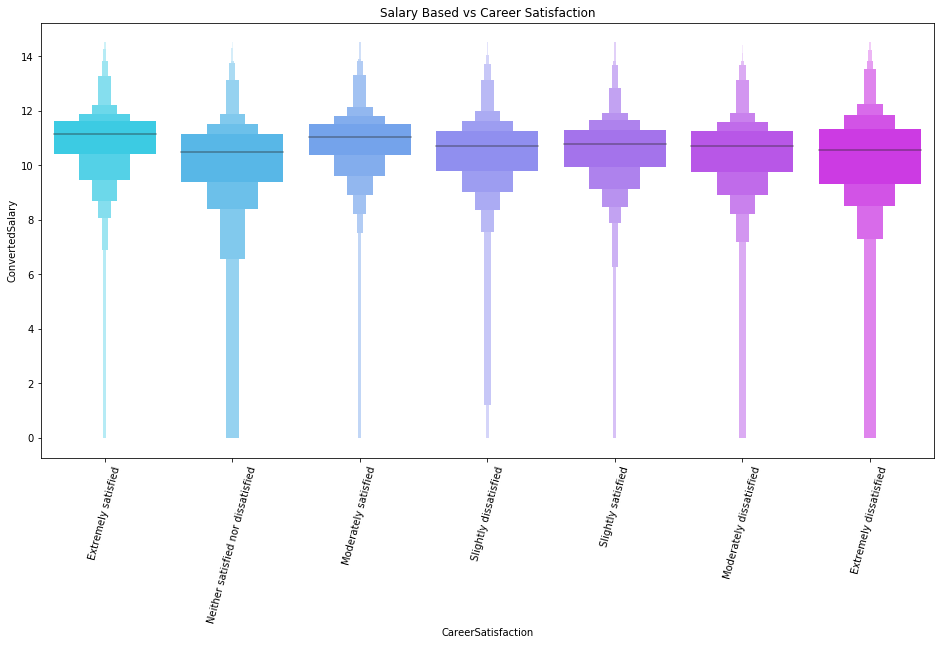

In [37]:
CareerSatisfaction = df['CareerSatisfaction'].value_counts()
colors = ['#FEBFB3', '#E1396C','#ff9933', '#ffd480', '#ff6699', '#ffa366', '#ff3300']
plotlypie(CareerSatisfaction.index, CareerSatisfaction.values, 0.4 , 0.05,colors, 
          'Are developer`s satisfied with current career ?' )

temp1 = []
temp2 = []
for val in CareerSatisfaction.index:
    temp1.append(np.sum(df["Gender"][df['CareerSatisfaction'] == val] == 'Male'))
    temp2.append(np.sum(df["Gender"][df['CareerSatisfaction'] == val] == 'Female'))
    
plotlybar(CareerSatisfaction.index, temp1, 'Male',CareerSatisfaction.index, temp2,
          'female','#9ECAE1','#ff99ff', title = 'CareerSatisfaction among Male and Female')
snslvplot( df["CareerSatisfaction"] , np.log(df['ConvertedSalary'] + 1), "Salary Based vs Career Satisfaction")

In [38]:
CompanySize = df['CompanySize'].value_counts()
plotlybar(CompanySize.index, CompanySize.values, title = 'Distribution of Company Size')

In [39]:
temp1 = []
temp2 = []
for val in CompanySize.index:
    temp1.append(np.sum(df["Gender"][df['CompanySize'] == val] == 'Male'))
    temp2.append(np.sum(df["Gender"][df['CompanySize'] == val] == 'Female'))

plotlybar(CompanySize.index, temp1, 'Male',CompanySize.index, temp2,
          'female','#9ECAE1','#ff99ff', title = 'Gender distribution in Companies')

In [40]:
JobSearchStatus = df['JobSearchStatus'].value_counts()
colors = ['#FEBFB3', '#E1396C','#ff9933']
plotlypie(JobSearchStatus.index, JobSearchStatus.values, 0.4 , 0.05,colors, 'Distribution of job search status' )

In [41]:
LastNewJob = df['LastNewJob'].value_counts()
colors = ['#FEBFB3', '#E1396C','#ff9933', '#ffd480', '#ff3300']
plotlypie(LastNewJob.index, LastNewJob.values, 0.4 , 0.05,colors, 'Distribution of current job' )

In [42]:
StackOverflowHasAccount = df['StackOverflowHasAccount'].value_counts()
colors = ['#FEBFB3', '#E1396C','#ff9933', '#ffd480', '#ff6699', '#ffa366', '#ff3300']
plotlypie(StackOverflowHasAccount.index, StackOverflowHasAccount.values, 0.4 , 0.05,colors,
          'How many developers has stackoverflow account ?' )
for val in StackOverflowHasAccount.index:
    temp1.append(np.sum(df["Gender"][df['StackOverflowHasAccount'] == val] == 'Male'))
    temp2.append(np.sum(df["Gender"][df['StackOverflowHasAccount'] == val] == 'Female'))
plotlybar(StackOverflowHasAccount.index, temp1, 'Male',StackOverflowHasAccount.index, temp2,
          'Female','#9ECAE1','#ff99ff', title = 'How many Male and Female developers has stackoverflow account ?')

In [44]:
hackathonReasons = pd.DataFrame(df["HackathonReasons"].dropna().str.split(';').tolist()).stack()
hackathonReasons = hackathonReasons.value_counts()
plotlybar(hackathonReasons.index, hackathonReasons.values, title = 'Why do developers participate in Hackathons?')

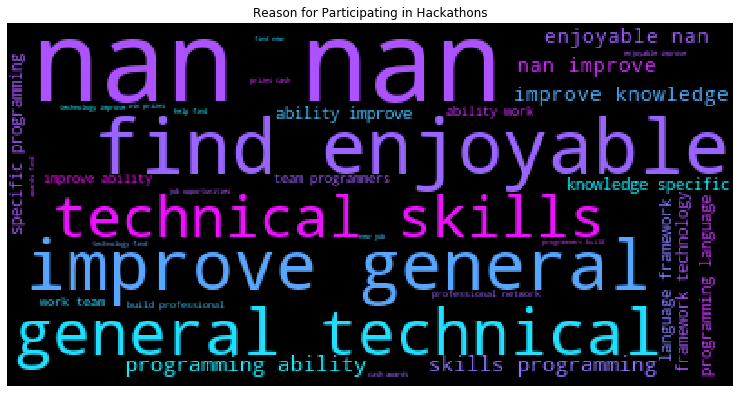

In [50]:
text = " ".join((df['HackathonReasons']).astype(str)).lower()
wc = WordCloud(max_words=1200, stopwords=STOPWORDS, colormap='cool', background_color='Black').generate(text)
plt.figure(figsize=(13,13))
plt.imshow(wc)
plt.axis('off')
plt.title('Reason for Participating in Hackathons');

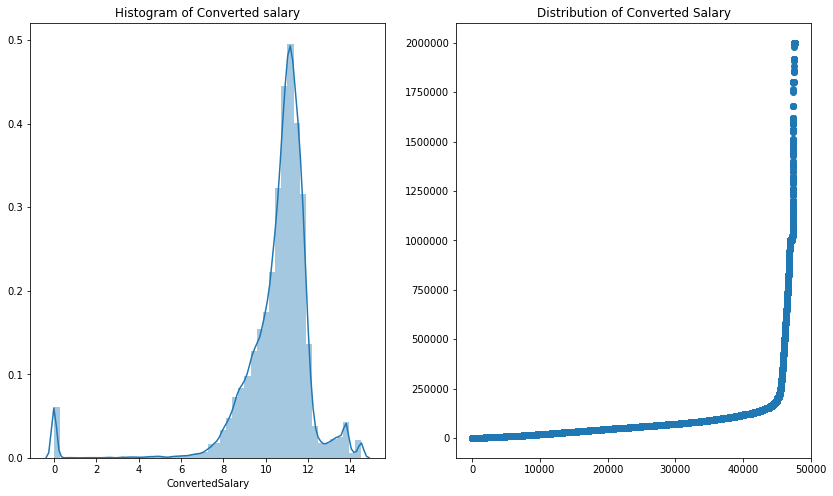

In [45]:
plt.figure(figsize = (14,8))
plt.subplot(1,2,1)
ax1 = sns.distplot(np.log(df["ConvertedSalary"].dropna() + 1))
ax1.set_title('Histogram of Converted salary')

plt.subplot(1,2,2)
plt.scatter(range(df.shape[0]), np.sort(df['ConvertedSalary'].values))
plt.title("Distribution of Converted Salary")
plt.show()

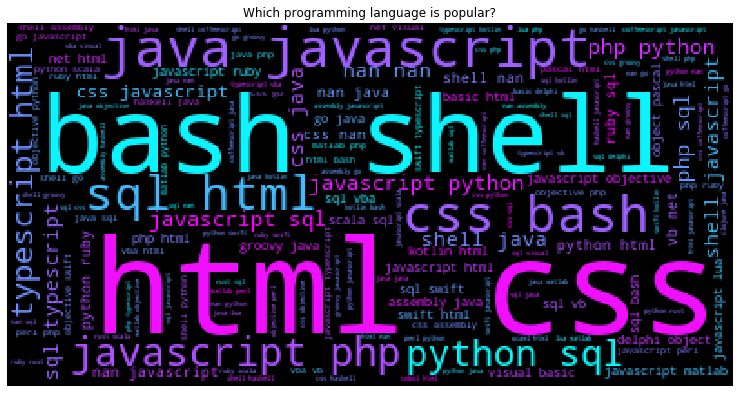

In [51]:
text = " ".join((df['LanguageWorkedWith']).astype(str)).lower()
wc = WordCloud(max_words=1200, stopwords=STOPWORDS, colormap='cool', background_color='Black').generate(text)
plt.figure(figsize=(13,13))
plt.imshow(wc)
plt.axis('off')
plt.title('Which programming language is popular?');
